In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from skbio.stats.composition import ilr,clr,alr
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

https://www.kaggle.com/datasets/mcdonalds/nutrition-facts/data (bộ đẹp nhưng chỉ 260 data)
https://www.kaggle.com/datasets/joebeachcapital/fast-food (có vẻ bộ thô của bên trên. 1188 data)
https://www.kaggle.com/datasets/utkarshx27/starbucks-nutrition (này cút 77 data)
https://www.kaggle.com/datasets/ulrikthygepedersen/fastfood-nutrition ( 512 data, tuy tinh hưng vẫn ko ổn)
  *https://www.kaggle.com/datasets/mexwell/food-vitamins-minerals-macronutrient (7000data cũng ổn, mô tả dữ liệu khá dài nên chưa đánh giá đc, việc tiền sử lý dữ liệu quá lâu)
https://www.kaggle.com/datasets/thedevastator/the-nutritional-content-of-food-a-comprehensive (khá ổn đó, 8000 data, đơn vị các biến đều là gam, nhưng 54 biến thì...sử lý cũng khá khó)

https://www.kaggle.com/datasets/lakrasmriti/crop-recommendation (2200data, 8 field, chỉ có phân tích đc ở NPK)
https://www.kaggle.com/datasets/sivapriyagarladinne/telangana-post-monsoon-ground-water-quality-data?select=ground_water_quality_2020_post.csv (368data, nếu sài cả 3 bộ thì cỡ 1000, vẫn khá khó dùng dữ liệu thôi vậy...)
https://www.kaggle.com/datasets/varshitanalluri/crop-price-prediction-dataset (như bộ NPK ấy, cũng ko có nhìu thứ để sài)

        https://www.kaggle.com/datasets/ruthgn/wine-quality-data-set-red-white-wine (6500data, dữ liệu tinh biến quan sát đều là khối lượng/thể tích, cũng khá hợp để hồi quy)

  https://www.kaggle.com/datasets/cristianminas/geochemical-variations-in-igneous-rocks-mining/data (mọi thứ đều khá ổn chỉ là nhìn cũng đánh giá đc là khá khó linear)

  https://www.kaggle.com/datasets/deepaksirohiwal/delhi-air-quality (18k data, các biến đều ổn để Coda nhưng hồi quy thì...)
   https://www.kaggle.com/datasets/seshupavan/air-pollution-data-of-india-2020-2023 (23k data, các biến khá ổn như bộ bên trên, có thêm 1 trường api để đánh giá chất lượng nhưng cũng ko có quá nhiều)
  *https://www.kaggle.com/datasets/abhisheksjha/time-series-air-quality-data-of-india-2010-2023 (dữ liệu rất nhiều, đồng bộ đơn vị đo các biến, chưa đọc mô tả nên chưa biết)
  *https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india?select=city_day.csv (30k dữ liệu, các biến giống bộ bên trên)

https://www.kaggle.com/datasets/jamesvandenberg/renewable-power-generation/data (31 data???)
https://www.kaggle.com/code/dianaddx/geospatial-analysis-of-global-power-plants (dell có gì nhưng vẽ đẹp)

https://www.kaggle.com/datasets/akhiljethwa/world-energy-statistics (bộ dữ liệu hơi ít, 600 data, các biến khá ổn)


In [9]:
df = pd.DataFrame(pd.read_csv("./Family_Income_and_Expenditure.csv"))
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [10]:
columns_to_select = ['Total Household Income','Region','Total Food Expenditure','Main Source of Income','Agricultural Household indicator','Bread and Cereals Expenditure','Total Rice Expenditure','Meat Expenditure','Total Fish and marine products Expenditure','Fruit Expenditure','Vegetables Expenditure','Restaurant and hotels Expenditure','Alcoholic Beverages Expenditure','Tobacco Expenditure','Clothing, Footwear and Other Wear Expenditure','Housing and water Expenditure','Imputed House Rental Value','Medical Care Expenditure','Transportation Expenditure','Communication Expenditure','Education Expenditure','Miscellaneous Goods and Services Expenditure','Special Occasions Expenditure','Crop Farming and Gardening expenses']
df = df[columns_to_select]
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,8230,41370,27000,3520,12900,5700,29300,9150,1500,0
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,2735,14340,7200,70,324,420,425,6450,500,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,1390,16638,6600,60,6840,660,300,3762,500,15580
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,4620,31122,16800,140,6996,2100,0,8472,1000,18887


In [11]:
eat_and_drink = ['Bread and Cereals Expenditure',
                 'Total Rice Expenditure','Meat Expenditure',
                 'Total Fish and marine products Expenditure',
                 'Fruit Expenditure','Vegetables Expenditure',
                 'Restaurant and hotels Expenditure']
data_food = df[eat_and_drink]
#data_food['total'] = data_food.sum(axis=1)
data_food.head()



,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure
0,42140,38300,24676,16806,3325,13460,3000
1,17329,13008,17434,11073,2035,7833,2360
2,34182,32001,7783,2590,1730,3795,4545
3,34030,28659,10914,10812,690,7887,6280
4,34820,30167,18391,11309,1395,11260,6400


In [17]:
# Chuyển đổi các giá trị để tổng mỗi hàng bằng 1
data_food = data_food.div(data_food.sum(axis=1), axis=0)
data_food.head()



,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure
0,0.297374,0.270276,0.174134,0.118597,0.023464,0.094985,0.021170
1,0.243823,0.183026,0.245301,0.155800,0.028633,0.110212,0.033206
2,0.394593,0.369416,0.089846,0.029899,0.019971,0.043809,0.052467
3,0.342796,0.288692,0.109940,0.108913,0.006951,0.079448,0.063261
4,0.306131,0.265223,0.161690,0.099427,0.012265,0.098996,0.056268


In [13]:
# Chuyển đổi CLR
clr_transformed = clr(data_food + 1e-10)  # Thêm một giá trị nhỏ để tránh log(0)

# Chuyển đổi thành DataFrame
clr_df = pd.DataFrame(clr_transformed, columns=eat_and_drink)

# Xác định biến đầu ra

# Loại bỏ các điểm bất thường
#y_clean = y[(y < y.quantile(0.99)) & (y > y.quantile(0.01))]

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(clr_df, y, test_size=0.3, random_state=42)

# Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

NameError: name 'y' is not defined

In [15]:
# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 1843914305.1063864
R^2 Score: 0.30295791241989856


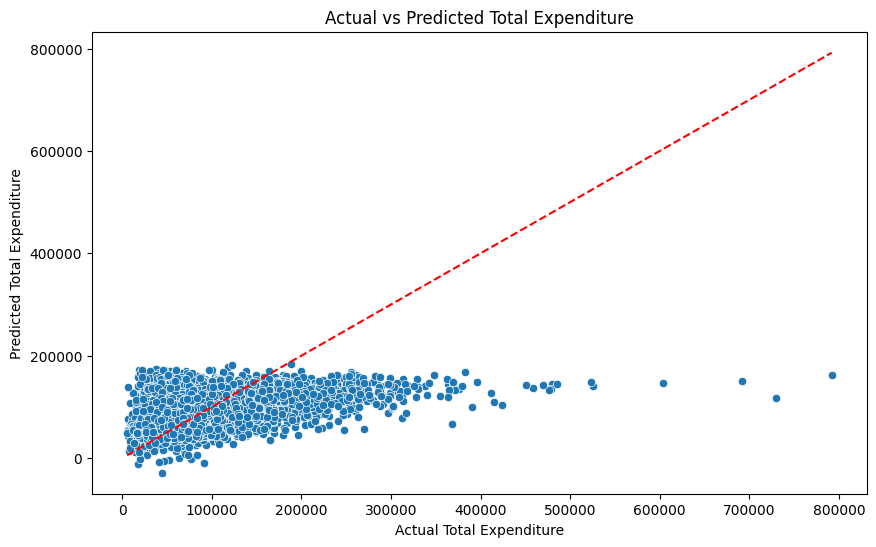

In [16]:
# Vẽ biểu đồ Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Total Expenditure')
plt.ylabel('Predicted Total Expenditure')
plt.title('Actual vs Predicted Total Expenditure')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

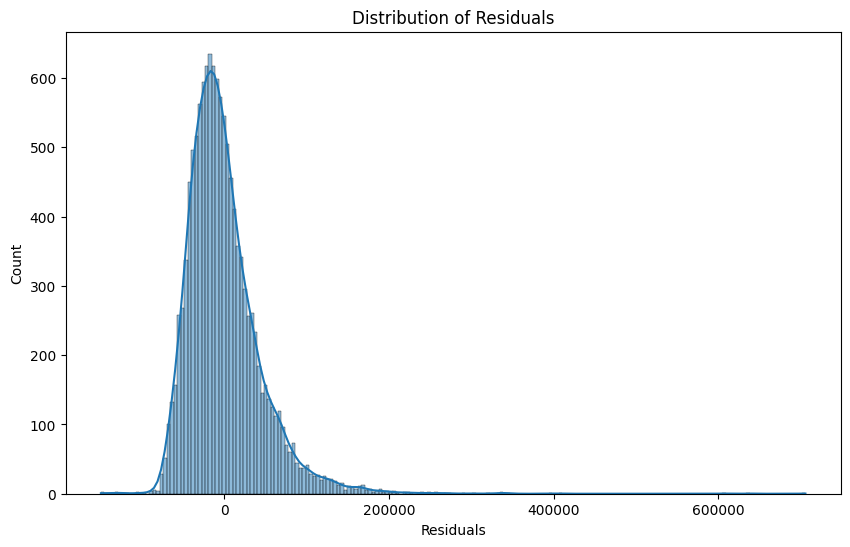

In [ ]:
# Vẽ biểu đồ phân phối phần dư
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

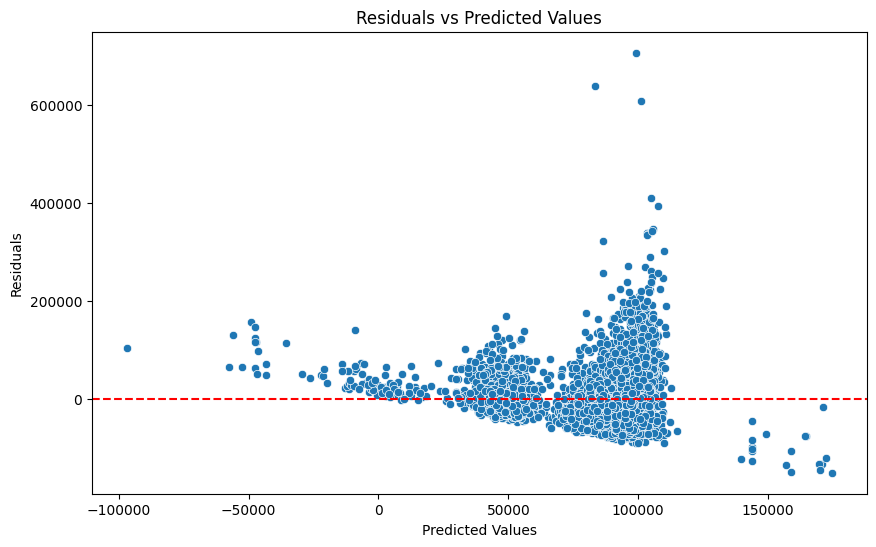

In [ ]:
# Vẽ biểu đồ Residuals vs Predicted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.axhline(0, color='red', linestyle='--')
plt.show()

In [ ]:
# Chuyển đổi ILR
ilr_transformed = ilr(data_food + 1e-10)

# Chuyển đổi thành DataFrame
ilr_df = pd.DataFrame(ilr_transformed)
ilr_df.head()

,0,1,2,3,4,5,6
0,0.067562,0.397954,0.614032,1.924838,0.295199,1.639247,19.352179
1,0.202810,-0.122025,0.306815,1.752830,0.200767,1.280371,1.950223
2,0.046621,1.181300,1.788179,1.746052,0.708528,0.431850,3.015005
3,0.121463,0.858390,0.615105,2.937672,0.174590,0.358500,2.715738
4,0.101430,0.462634,0.748247,2.451362,0.095123,0.603444,2.222318


In [ ]:
# Chọn một biến tham chiếu, ví dụ, biến cuối cùng
alr_transformed = alr(data_food + 1e-10, denominator_idx=-1)

# Chuyển đổi thành DataFrame
alr_columns = [f'{col}/denominator' for col in eat_and_drink[:-1]]
alr_df = pd.DataFrame(alr_transformed, columns=alr_columns)
alr_df.head()

,Bread and Cereals Expenditure/denominator,Total Rice Expenditure/denominator,Meat Expenditure/denominator,Total Fish and marine products Expenditure/denominator,Fruit Expenditure/denominator,Vegetables Expenditure/denominator,Restaurant and hotels Expenditure/denominator
0,21.813087,21.717539,21.277920,20.893825,19.273559,20.671812,19.170702
1,2.893203,2.606387,2.899244,2.445332,0.751318,2.099168,0.899484
2,4.841032,4.775100,3.361275,2.260991,1.857455,2.643018,2.823361
3,4.261212,4.089437,3.124016,3.114626,0.362905,2.799185,2.571339
4,3.510971,3.367528,2.872641,2.386378,0.293674,2.382036,1.817077
